**复习：**回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [5]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#加载result.csv这个数据
df = pd.read_csv('data/result.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

#思考回答
#这一部分需要了解可视化图案的的逻辑，知道什么样的图案可以表达什么样的信号b
- 折线图 数据的变化曲线,展示数据随时间或有序类别的波动情况的趋势变化。
  
  适用：有序的类别，比如时间。  
  局限：无序的类别无法展示数据特点。  
- 柱状图 展示多个分类的数据变化和同类别各变量之间的比较情况。  
  适用：对比分类数据。   
  局限：分类过多则无法展示数据特点。   
- 饼图:用来展示各类别占比，比如男女比例。

  适用：了解数据的分布情况。   
  缺陷：分类过多，则扇形越小，无法展现图表。
- 散点图:两个一维数据序列的关系 ,用于发现各变量之间的关系。

  适用：存在大量数据点，结果更精准，比如回归分析。   
  缺陷：数据量小的时候会比较混乱。
 
- 地图 需要用到地理位置或相关数据   
  适合：展现呈面状但属分散分布的数据，比如人口密度等。   
  缺陷：数据分布和地理区域大小的不对称。通常大量数据会集中在地理区域范围小的人口密集区，容易造成用户对数据的误解。

#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

In [3]:
#先按性别分组，再统计数量
sexNum = df.groupby('Sex')['Survived'].sum()
sexNum


Sex
female    233
male      109
Name: Survived, dtype: int64

bar(x, height, width=0.8, bottom=None, align=‘center’, data=None, )

x 表示x坐标，数据类型为int或float类型，  
height 表示柱状图的高度，也就是y坐标值，数据类型为int或float类型，  
width 表示柱状图的宽度，取值在0~1之间，默认为0.8  
bottom 柱状图的起始位置，也就是y轴的起始坐标，   
align 柱状图的中心位置，“center”,"lege"边缘  
color 柱状图颜色
edgecolor 边框颜色
linewidth 边框宽度
tick_label 下标标签
log 柱状图y周使用科学计算方法，bool类型
orientation 柱状图是竖直还是水平，竖直：“vertical”，水平条：“horizontal”


Text(0.5, 1.0, 'survived')

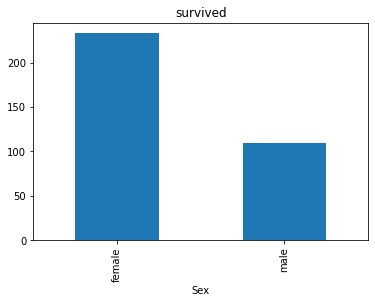

In [15]:
sexNum.plot.bar()
plt.title('survived')

【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

In [17]:
#按性别和生存分组、统计,很明显可以看到女性存活人数更多

sexNot =df.groupby(['Sex','Survived'])['Survived'].count().unstack()
sexNot


Survived,0,1
Sex,,
female,81,233
male,468,109


- 在用pandas进行数据重排时，经常用到stack和unstack两个函数。stack的意思是堆叠，堆积，unstack即“不要堆叠”,
  stack函数会将数据从”表格结构“变成”花括号结构“，即将其行索引变成列索引;   
  unstack函数将数据从”花括号结构“变成”表格结构“，即要将其中一层的列索引变成行索引。


Text(0.5, 1.0, 'died')

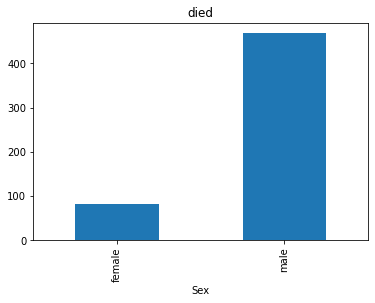

In [21]:
sexNot[0].plot.bar()
plt.title('died')

<AxesSubplot:xlabel='Sex'>

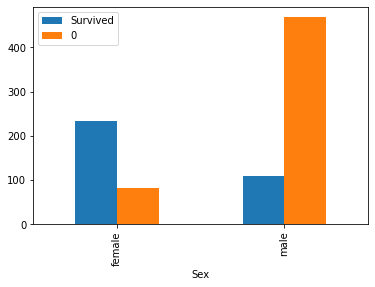

In [22]:
#合并生存和死亡两个图
pd.concat([sexNum,sexNot[0]],axis=1).plot.bar()

#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

Text(0.5, 0, 'sex')

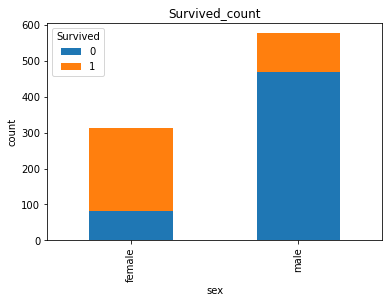

In [24]:
#代码编写
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
df.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('Survived_count')
plt.ylabel('count')
plt.xlabel('sex')

【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

In [26]:
#代码编写
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡

fare = df.groupby(['Fare','Survived'])['Survived'].count().unstack()
fare


Survived,0,1
Fare,,
0.0000,14.0,1.0
4.0125,1.0,NaN
5.0000,1.0,NaN
6.2375,1.0,NaN
6.4375,1.0,NaN
...,...,...
227.5250,1.0,3.0
247.5208,1.0,1.0
262.3750,NaN,2.0


Text(0.5, 0, 'fare')

<Figure size 1080x1080 with 0 Axes>

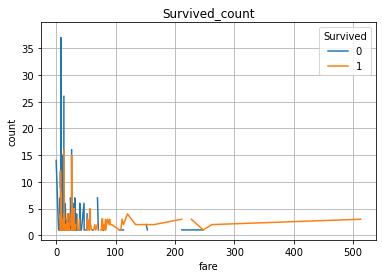

In [37]:
#plot默认是折线图
plt.figure(figsize=(15, 15))
fare.plot(grid=True)
plt.title('Survived_count')
plt.ylabel('count')
plt.xlabel('fare')

可以发现，票价高的存活率很高，票价低的存活率低

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

In [40]:
#代码编写
# 1表示生存，0表示死亡

pclass_sur = df.groupby(['Pclass','Survived'])['Survived'].count().unstack()
pclass_sur

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0.5, 0, 'pclass')

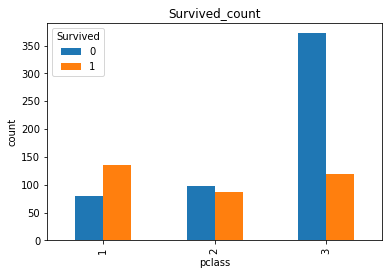

In [42]:
pclass_sur.plot.bar()
plt.title('Survived_count')
plt.ylabel('count')
plt.xlabel('pclass')

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结

In [ ]:
#思考题回答

一等舱的存活率高，存活人数大于死亡人数，三等舱的死亡人数很高，远远大于存活人数。

#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

Text(0.5, 0, 'age')

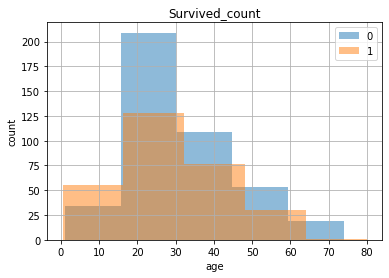

In [45]:
#代码编写

df.Age[df.Survived == 0].hist(bins=5,alpha=0.5)
df.Age[df.Survived == 1].hist(bins=5,alpha=0.5)
plt.legend((0,1))
plt.title('Survived_count')
plt.ylabel('count')
plt.xlabel('age')

Text(0.5, 0, 'age')

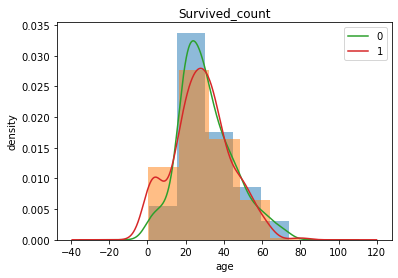

In [50]:
#根据分布密度hua
df.Age[df.Survived == 0].hist(bins=5,alpha=0.5,density=1)
df.Age[df.Survived == 1].hist(bins=5,alpha=0.5,density=1)
df.Age[df.Survived == 0].plot.density()
df.Age[df.Survived == 1].plot.density()
plt.legend((0,1))
plt.title('Survived_count')
plt.ylabel('density')
plt.xlabel('age')

#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

<AxesSubplot:ylabel='Density'>

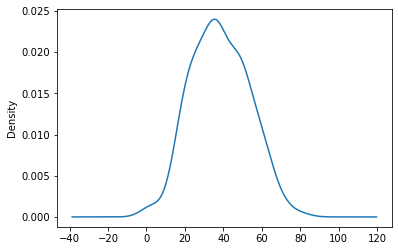

In [52]:
#代码编写
df.Age[df.Pclass == 1].plot.density()


In [54]:
unique_Pclass = df.Pclass.unique()
unique_Pclass.sort()
unique_Pclass

array([1, 2, 3])

Text(0.5, 0, 'age')

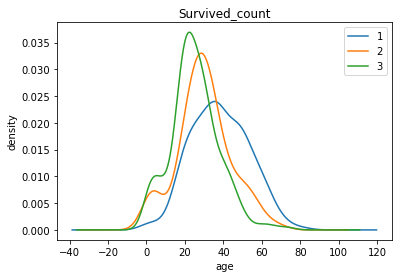

In [58]:
for i in unique_Pclass:
    df.Age[df.Pclass == i].plot.density()
plt.legend(unique_Pclass)
plt.title('Survived_count')
plt.ylabel('density')
plt.xlabel('age')

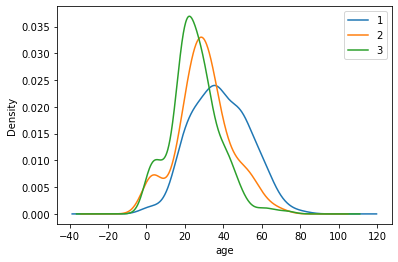

In [59]:
#方法二
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")

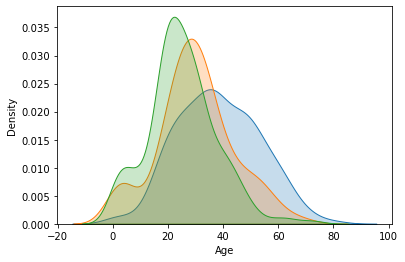

In [61]:
#方法三
import seaborn as sns
for i in unique_Pclass:
    sns.kdeplot(df.Age[df.Pclass == i],shade =True,)

【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现

#思考题回答  
(1) 从上面的可视化图可以发现，男性存活人数明显低于女性生存人数；    
(2) 三等舱的存活人数大于死亡人数，一等舱死亡人数远远大于存活人数，存活率和舱位等级有一定关系；   
(3) 年龄小于20岁的年龄段的存活人数大于死亡人数，存活率更高。


【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？